Firstly, necessary libraries are imported and versions of the libraries are printed. Then the dataset is loaded to pandas DataFrame. Data columns are renamed.

In [1]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)
import pandas; print("Pandas", pandas.__version__)
import matplotlib.pyplot; print("Matplotlib", matplotlib.__version__)
import seaborn; print("Seaborn", seaborn.__version__)

Windows-10-10.0.19041-SP0
Python 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
NumPy 1.20.1
SciPy 1.6.2
Scikit-Learn 0.24.1
Pandas 1.2.4
Matplotlib 3.3.4
Seaborn 0.11.1


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

In [4]:
%time data = pd.read_csv('breast-cancer-wisconsin.csv', header = None)

print("Shape of the Data: ", data.shape )

data=data.drop(data.columns[0],axis=1)

data.columns = ['clump_thickness', 'size_uniformity', 'shape_uniformity', 'marginal_adhesion', 'epithelial_size', 'bare_nucleoli', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'diagnosis']

data.head()

Wall time: 2.99 ms
Shape of the Data:  (699, 11)


,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,diagnosis
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   clump_thickness    699 non-null    int64  
 1   size_uniformity    699 non-null    int64  
 2   shape_uniformity   699 non-null    int64  
 3   marginal_adhesion  699 non-null    int64  
 4   epithelial_size    699 non-null    int64  
 5   bare_nucleoli      683 non-null    float64
 6   bland_chromatin    699 non-null    int64  
 7   normal_nucleoli    699 non-null    int64  
 8   mitoses            699 non-null    int64  
 9   diagnosis          699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [6]:
data.isnull().sum()

clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
diagnosis             0
dtype: int64

In [7]:
data["bare_nucleoli"]=data["bare_nucleoli"].fillna(data["bare_nucleoli"].mean())

In [8]:
data.isnull().sum()

clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
diagnosis            0
dtype: int64

In [9]:
data["bare_nucleoli"]=data["bare_nucleoli"].astype(int)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   clump_thickness    699 non-null    int64
 1   size_uniformity    699 non-null    int64
 2   shape_uniformity   699 non-null    int64
 3   marginal_adhesion  699 non-null    int64
 4   epithelial_size    699 non-null    int64
 5   bare_nucleoli      699 non-null    int32
 6   bland_chromatin    699 non-null    int64
 7   normal_nucleoli    699 non-null    int64
 8   mitoses            699 non-null    int64
 9   diagnosis          699 non-null    int64
dtypes: int32(1), int64(9)
memory usage: 52.0 KB


<AxesSubplot:>

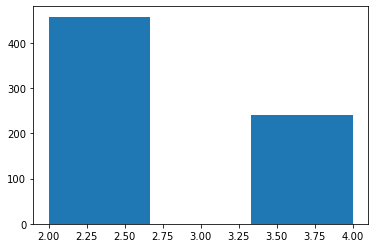

In [10]:
data['diagnosis'].hist(bins=3,grid=False)

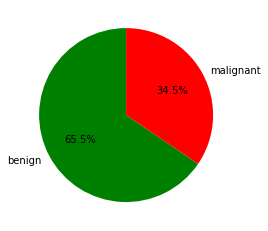

Number of Benign: 458
Number of Malignant: 241


In [11]:
value_count = data['diagnosis'].value_counts()
labels=['benign', 'malignant']
# Plotting a pie chart of the imbalanced dataset 
colors = ['green', 'red']
explode =(0,0.1,0,0.1,0) 
plt.pie(value_count, labels= labels, colors=colors, startangle=90, autopct='%.1f%%') 
plt.show()

# Printing the number of counts for the values of the labels in the diagnosis column 
B, M = value_count 
print("Number of Benign: {}".format(B))
print("Number of Malignant: {}".format(M))

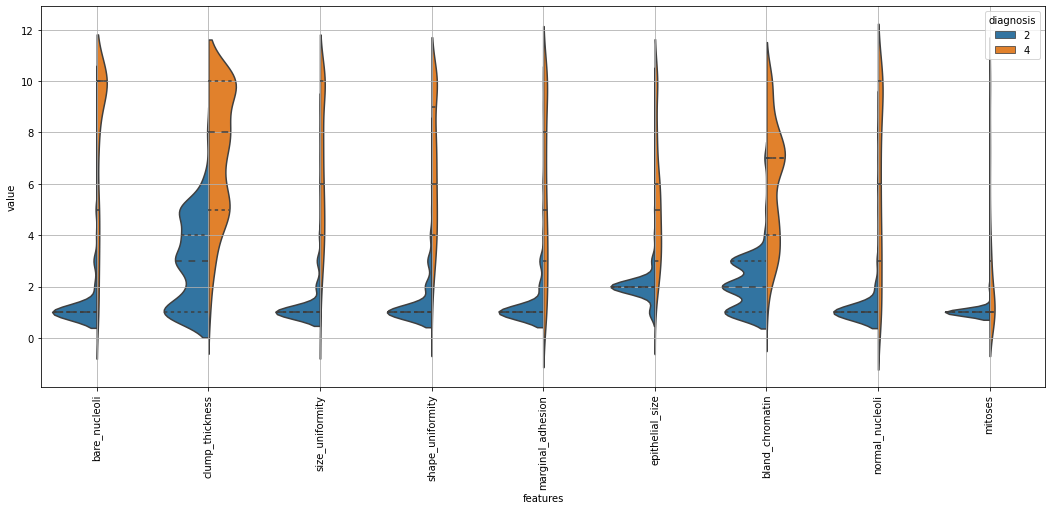

In [23]:
# Displaying a violin plot for the first ten features 
labels =  data["bare_nucleoli"]
input_features = data.iloc[:, 0:9]

# Normalizing the dataframe 
dataN2 = (input_features - input_features.mean()) / (input_features.std())
input_features = pd.concat([data["bare_nucleoli"], data.iloc[:, 0:10]], axis = 1)

data = pd.melt(input_features, id_vars = "diagnosis", var_name = "features", 
              value_name = "value")

# Plotting the first Ten feature
plt.figure(figsize = (18, 7))
sns.violinplot(x = "features", y = "value", hue = "diagnosis", data = data, split = True, 
              inner = "quart")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show() 

<AxesSubplot:>

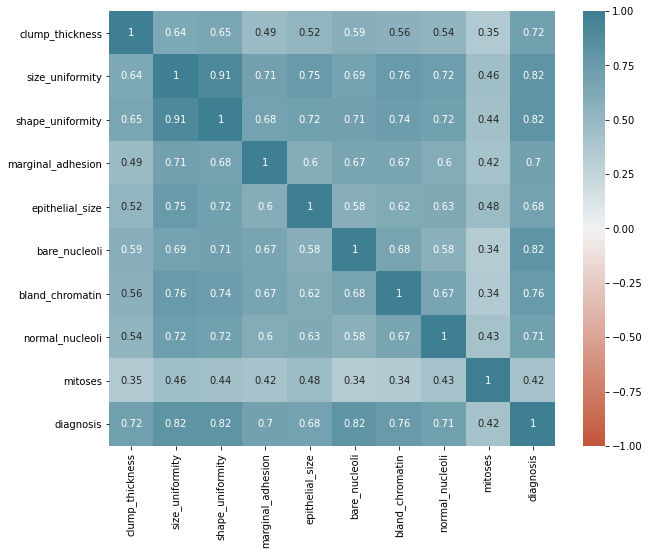

In [11]:
fig1 = plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap=sns.diverging_palette(20, 220, n=200),vmax=1.0,vmin=-1.0)

In [12]:
data.describe(percentiles=None).transpose()

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.532189,3.602774,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
diagnosis,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [13]:
y = data.values[:,-1].copy()
X = data.values[:,:-1].copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X , y , test_size = 0.20, random_state = 1)
X_train

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 6, 8, ..., 5, 7, 1],
       [4, 1, 1, ..., 3, 1, 1],
       ...,
       [1, 3, 3, ..., 7, 2, 1],
       [3, 1, 4, ..., 3, 1, 1],
       [6, 2, 1, ..., 7, 1, 1]], dtype=int64)

In [14]:
X_test

array([[ 5,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  2,  1,  1],
       [ 4,  1,  1, ...,  1,  1,  1],
       ...,
       [ 5,  2,  1, ...,  3,  1,  1],
       [10,  4,  6, ...,  7,  1,  1],
       [10,  8,  4, ...,  3, 10,  4]], dtype=int64)

In [15]:
y_train_df=pd.DataFrame(y_train)
y_train_df

,0
0,2
1,4
2,2
3,2
4,2
...,...
554,2
555,2
556,2
557,2


<AxesSubplot:>

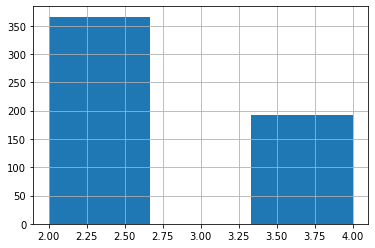

In [16]:
y_train_df[0].hist(bins=3)

In [17]:
X_train_df=pd.DataFrame(X_train)
X_train_df

,0,1,2,3,4,5,6,7,8
0,1,1,1,1,1,3,1,1,1
1,1,6,8,10,8,10,5,7,1
2,4,1,1,1,2,1,3,1,1
3,5,2,2,4,2,4,1,1,1
4,2,1,1,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...
554,2,1,1,1,2,1,2,1,1
555,3,1,1,1,2,1,2,1,1
556,1,3,3,2,2,1,7,2,1
557,3,1,4,1,2,3,3,1,1


# Oversampling

Before making predictions for the target variable, it is crucial to check the distribution of our target variable. If it is unbalanced, our predictions can go wrong.

In [18]:
y_train_df[0].value_counts(normalize=True).mul(100).round(1)

2    65.5
4    34.5
Name: 0, dtype: float64

As it is seen above, the target variable is quite unbalanced.

In [19]:
from collections import Counter
print(sorted(Counter(y_train).items()))

[(2, 366), (4, 193)]


It means 2: benign and 4: malignant

To rebalance our training target variable, we used SMOTE oversampling technique for just our training dataset:

In [20]:
import imblearn.over_sampling
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(2, 366), (4, 366)]


Looks like both classes of the target variable are equally numbered now to overcome misclassification.

As all variables are ready to classify, we can make modelling parts in Matlab.

Finally, I formed train and test DataFrames to save and keep it as a seperate sheet to model them in Matlab:

In [21]:
test_file=pd.DataFrame()
test_file['clump_thickness']=X_test[:,0]
test_file['size_uniformity']=X_test[:,1]
test_file['shape_uniformity']=X_test[:,2]
test_file['marginal_adhesion']=X_test[:,3]
test_file['epithelial_size']=X_test[:,4]
test_file['bare_nucleoli']=X_test[:,5]
test_file['bland_chromatin']=X_test[:,6]
test_file['normal_nucleoli']=X_test[:,7]
test_file['mitoses']=X_test[:,8]
test_file['diagnosis']=y_test
test_file

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,diagnosis
0,5,1,1,6,3,1,1,1,1,2
1,1,1,1,1,2,1,2,1,1,2
2,4,1,1,2,2,1,1,1,1,2
3,4,2,3,5,3,8,7,6,1,4
4,3,1,1,1,3,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...
135,5,3,6,1,2,1,1,1,1,2
136,3,2,1,1,2,2,3,1,1,2
137,5,2,1,1,2,1,3,1,1,2
138,10,4,6,4,5,10,7,1,1,4


In [22]:
test_file.to_csv("ML_testfile.csv", index=False)

In [23]:
train_file=pd.DataFrame()
train_file['clump_thickness']=X_train[:,0]
train_file['size_uniformity']=X_train[:,1]
train_file['shape_uniformity']=X_train[:,2]
train_file['marginal_adhesion	']=X_train[:,3]
train_file['epithelial_size']=X_train[:,4]
train_file['bare_nucleoli']=X_train[:,5]
train_file['bland_chromatin']=X_train[:,6]
train_file['normal_nucleoli']=X_train[:,7]
train_file['mitoses']=X_train[:,8]
train_file['diagnosis']=y_train
train_file

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion\t,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,diagnosis
0,1,1,1,1,1,3,1,1,1,2
1,1,6,8,10,8,10,5,7,1,4
2,4,1,1,1,2,1,3,1,1,2
3,5,2,2,4,2,4,1,1,1,2
4,2,1,1,1,2,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...
554,2,1,1,1,2,1,2,1,1,2
555,3,1,1,1,2,1,2,1,1,2
556,1,3,3,2,2,1,7,2,1,2
557,3,1,4,1,2,3,3,1,1,2


In [24]:
train_file.to_csv("ML_trainfile.csv", index=False)